In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import os
os.chdir("/content/gdrive/My Drive/")

In [16]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-04-03 08:30:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.139, 142.251.2.100, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-03 08:30:50--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  33.4MB/s    in 0.6s    

2024-04-03 08:30:55 (33

## 資料集為大專校院外籍專任教師統計

In [3]:
import pandas as pd

csv_file = '/content/gdrive/My Drive/112-2LATIA/homework_1/111_foreignteacher1.csv'

df = pd.read_csv(csv_file, encoding='utf-8')

print(df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   學年度     629 non-null    int64 
 1   學校代號    629 non-null    int64 
 2   學校名稱    629 non-null    object
 3   國別代碼    629 non-null    int64 
 4   國別名稱    629 non-null    object
 5   教授男     629 non-null    int64 
 6   教授女     629 non-null    int64 
 7   副教授男    629 non-null    int64 
 8   副教授女    629 non-null    int64 
 9   助理教授男   629 non-null    int64 
 10  助理教授女   629 non-null    int64 
 11  講師男     629 non-null    int64 
 12  講師女     629 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 64.0+ KB
None


## 問題1. 哪一所學校擁有最多的外籍教師（包含教授, 副教授, 助理教授, 講師）

In [7]:
# 根據學校名稱分組，並計算每個學校的外籍教師人數
grouped_df = df.groupby('學校名稱').agg({
    '教授男': 'sum', '教授女': 'sum',
    '副教授男': 'sum', '副教授女': 'sum',
    '助理教授男': 'sum', '助理教授女': 'sum',
    '講師男': 'sum', '講師女': 'sum'
})

# 計算每所學校的總外籍教師人數
grouped_df['總外籍教師人數'] = grouped_df.sum(axis=1)

# 找到擁有最多外籍教職員工的學校
top_school = grouped_df.sort_values(by='總外籍教師人數', ascending=False).iloc[0]

# 取得結果
school_name = top_school.name
total_foreign_teachers = top_school['總外籍教師人數']

print(f"擁有最多外籍教師的學校是 {school_name}，該學校擁有 {total_foreign_teachers} 名外籍教師。")


擁有最多外籍教師的學校是 國立臺灣大學，該學校擁有 82 名外籍教師。


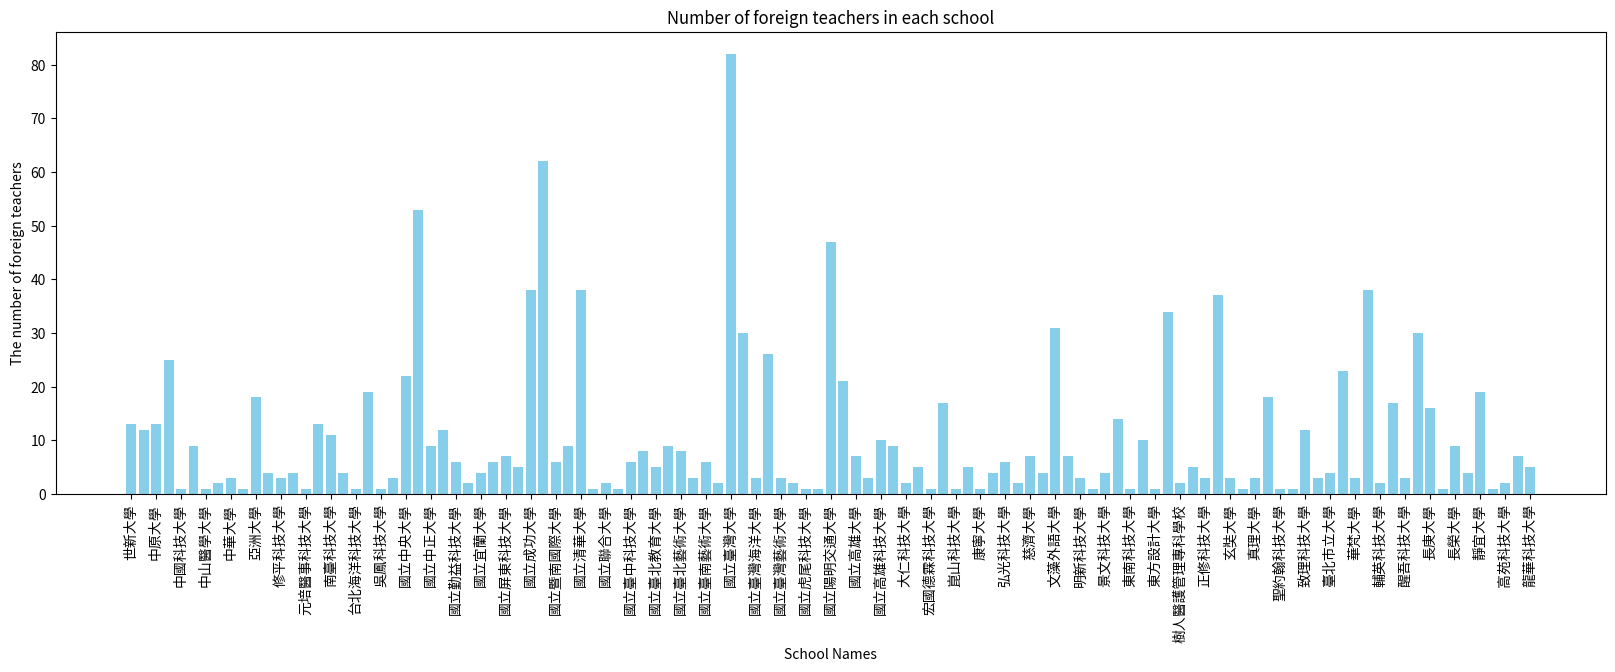

In [37]:

# 選擇學校名稱和對應的外籍教師人數
school_names = grouped_df.index
foreign_teacher_counts = grouped_df['總外籍教師人數']

# 設置圖表
plt.figure(figsize=(20, 6))
plt.bar(school_names, foreign_teacher_counts, color='skyblue')

# 添加標題和標籤
plt.title('Number of foreign teachers in each school')
plt.xlabel('School Names')
plt.ylabel('The number of foreign teachers')

# 將 x 軸標籤旋轉 90 度以避免重疊
plt.xticks(rotation=90)

plt.xticks(range(0, len(school_names), 2))
# 顯示圖表

plt.show()

## 問題2: 統計每所學校的男女教師比例, 並且找出性別比最高和最低的學校（性別比>1, 男性較多）

In [31]:
# 從原始資料框架中取得男性教師人數和女性教師人數
male_teachers = df.groupby('學校名稱').sum()['教授男'] + df.groupby('學校名稱').sum()['副教授男'] + df.groupby('學校名稱').sum()['助理教授男'] + df.groupby('學校名稱').sum()['講師男']
female_teachers = df.groupby('學校名稱').sum()['教授女'] + df.groupby('學校名稱').sum()['副教授女'] + df.groupby('學校名稱').sum()['助理教授女'] + df.groupby('學校名稱').sum()['講師女']

# 計算每間學校的性別比
gender_ratio = male_teachers / female_teachers

# 顯示每一間學校的男性教師人數和女性教師人數以及性別比
for school, male, female, ratio in zip(male_teachers.index, male_teachers, female_teachers, gender_ratio):
    if male == 0:
        ratio = '（只有女性教師）'
    elif female == 0:
        ratio = '（只有男性教師）'
    print(f'{school}: 男性外籍教師人數 = {male}, 女性外籍教師人數 = {female}, 性別比  = {ratio}')


世新大學: 男性外籍教師人數 = 11, 女性外籍教師人數 = 2, 性別比  = 5.5
中信金融管理學院: 男性外籍教師人數 = 11, 女性外籍教師人數 = 1, 性別比  = 11.0
中原大學: 男性外籍教師人數 = 10, 女性外籍教師人數 = 3, 性別比  = 3.3333333333333335
中國文化大學: 男性外籍教師人數 = 16, 女性外籍教師人數 = 9, 性別比  = 1.7777777777777777
中國科技大學: 男性外籍教師人數 = 0, 女性外籍教師人數 = 1, 性別比  = （只有女性教師）
中國醫藥大學: 男性外籍教師人數 = 7, 女性外籍教師人數 = 2, 性別比  = 3.5
中山醫學大學: 男性外籍教師人數 = 0, 女性外籍教師人數 = 1, 性別比  = （只有女性教師）
中臺科技大學: 男性外籍教師人數 = 1, 女性外籍教師人數 = 1, 性別比  = 1.0
中華大學: 男性外籍教師人數 = 3, 女性外籍教師人數 = 0, 性別比  = （只有男性教師）
亞東科技大學: 男性外籍教師人數 = 1, 女性外籍教師人數 = 0, 性別比  = （只有男性教師）
亞洲大學: 男性外籍教師人數 = 14, 女性外籍教師人數 = 4, 性別比  = 3.5
佛光大學: 男性外籍教師人數 = 2, 女性外籍教師人數 = 2, 性別比  = 1.0
修平科技大學: 男性外籍教師人數 = 3, 女性外籍教師人數 = 0, 性別比  = （只有男性教師）
僑光科技大學: 男性外籍教師人數 = 3, 女性外籍教師人數 = 1, 性別比  = 3.0
元培醫事科技大學: 男性外籍教師人數 = 1, 女性外籍教師人數 = 0, 性別比  = （只有男性教師）
元智大學: 男性外籍教師人數 = 9, 女性外籍教師人數 = 4, 性別比  = 2.25
南臺科技大學: 男性外籍教師人數 = 8, 女性外籍教師人數 = 3, 性別比  = 2.6666666666666665
南華大學: 男性外籍教師人數 = 4, 女性外籍教師人數 = 0, 性別比  = （只有男性教師）
台北海洋科技大學: 男性外籍教師人數 = 0, 女性外籍教師人數 = 1, 性別比  = （只有女性教師）
台南應用科技大學: 男性外籍教師人數 = 13

<ipython-input-31-62db156d1737>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  male_teachers = df.groupby('學校名稱').sum()['教授男'] + df.groupby('學校名稱').sum()['副教授男'] + df.groupby('學校名稱').sum()['助理教授男'] + df.groupby('學校名稱').sum()['講師男']
<ipython-input-31-62db156d1737>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  male_teachers = df.groupby('學校名稱').sum()['教授男'] + df.groupby('學校名稱').sum()['副教授男'] + df.groupby('學校名稱').sum()['助理教授男'] + df.groupby('學校名稱').sum()['講師男']
<ipython-input-31-62db156d1737>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, nume

In [39]:
max_ratio_school = None
min_ratio_school = None
max_ratio = 0
min_ratio = float('inf')

for school, ratio in gender_ratio.items():
    if female_teachers[school] == 0:
        ratio = '（只有男性教師）'
    elif male_teachers[school] == 0:
        ratio = '（只有女性教師）'
    else:
        ratio = male_teachers[school] / female_teachers[school]

    if ratio != '（只有女性教師）' and ratio != '（只有男性教師）':
        if ratio > max_ratio:
            max_ratio = ratio
            max_ratio_school = school
        if ratio < min_ratio:
            min_ratio = ratio
            min_ratio_school = school

# 顯示性別比最高和最低的學校
print(f'性別比最高的學校：{max_ratio_school}，性別比 = {max_ratio}')
print(f'性別比最低的學校：{min_ratio_school}，性別比 = {min_ratio}')
print("只有單一性別外籍教師不在此計")

性別比最高的學校：長庚大學，性別比 = 15.0
性別比最低的學校：明新科技大學，性別比 = 0.5
只有單一性別外籍教師不在此計


<ipython-input-43-28472bf92143>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  male_teachers = df.groupby('學校名稱').sum()['教授男'] + df.groupby('學校名稱').sum()['副教授男'] + df.groupby('學校名稱').sum()['助理教授男'] + df.groupby('學校名稱').sum()['講師男']
<ipython-input-43-28472bf92143>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  male_teachers = df.groupby('學校名稱').sum()['教授男'] + df.groupby('學校名稱').sum()['副教授男'] + df.groupby('學校名稱').sum()['助理教授男'] + df.groupby('學校名稱').sum()['講師男']
<ipython-input-43-28472bf92143>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, nume

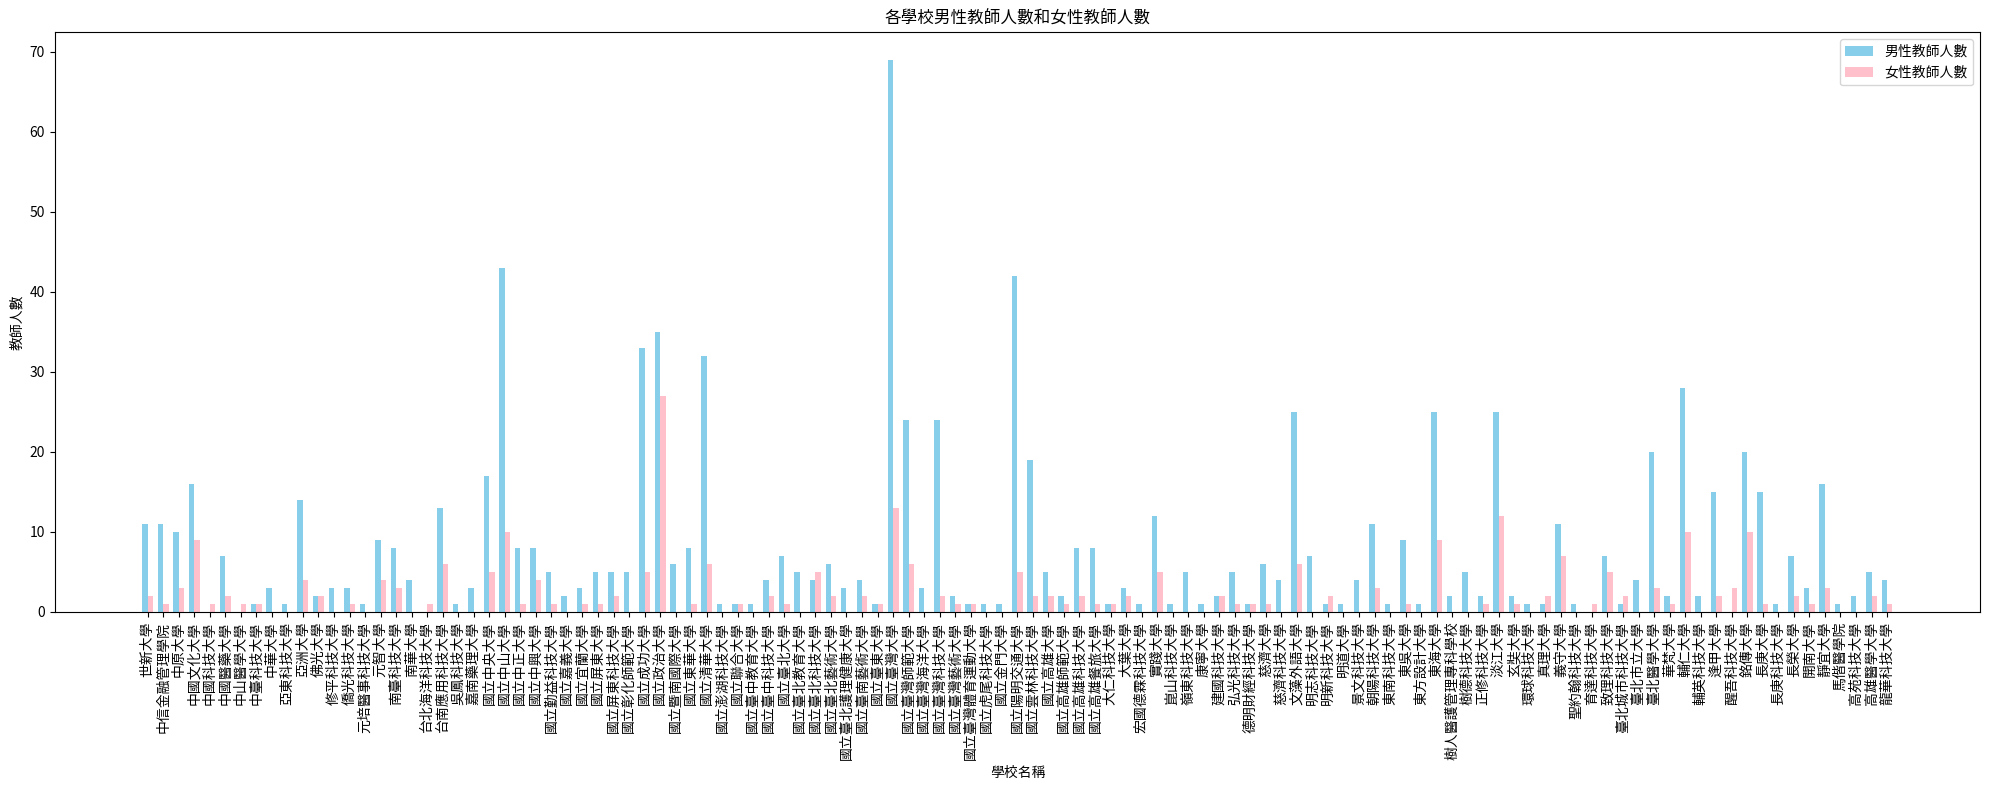

In [43]:
import numpy as np

# 取得每所學校的男性教師人數和女性教師人數
male_teachers = df.groupby('學校名稱').sum()['教授男'] + df.groupby('學校名稱').sum()['副教授男'] + df.groupby('學校名稱').sum()['助理教授男'] + df.groupby('學校名稱').sum()['講師男']
female_teachers = df.groupby('學校名稱').sum()['教授女'] + df.groupby('學校名稱').sum()['副教授女'] + df.groupby('學校名稱').sum()['助理教授女'] + df.groupby('學校名稱').sum()['講師女']

# 獲取學校名稱
schools = male_teachers.index

# 設置長條圖寬度
bar_width = 0.35

# 設置 x 軸位置
index = np.arange(len(schools))

# 繪製男性教師人數長條圖
plt.figure(figsize=(20, 8))
plt.bar(index, male_teachers, bar_width, color='skyblue', label='男性教師人數')

# 繪製女性教師人數長條圖
plt.bar(index + bar_width, female_teachers, bar_width, color='pink', label='女性教師人數')

# 添加刻度標籤
plt.xlabel('學校名稱')
plt.ylabel('教師人數')
plt.title('各學校男性教師人數和女性教師人數')
plt.xticks(index + bar_width / 2, schools, rotation=90)
plt.legend()

# 顯示圖表
plt.tight_layout()
plt.show()


## 問題3: 針對臺灣大學（外籍教師人數最多），觀察外籍教師國籍分佈

In [47]:
# 建立國家到大洲的映射字典
country_to_continent = {
    '台灣': '亞洲',
    '印度': '亞洲',
    '印尼': '亞洲',
    '日本': '亞洲',
    '南韓': '亞洲',
    '馬來西亞': '亞洲',
    '菲律賓': '亞洲',
    '新加坡': '亞洲',
    '斯里蘭卡': '亞洲',
    '越南': '亞洲',
    '俄羅斯': '歐洲',
    '澳大利亞': '大洋洲',
    '南非': '非洲',
    '比利時': '歐洲',
    '捷克': '歐洲',
    '法國': '歐洲',
    '希臘': '歐洲',
    '荷蘭': '歐洲',
    '西班牙': '歐洲',
    '瑞典': '歐洲',
    '瑞士': '歐洲',
    '英國': '歐洲',
    '德國': '歐洲',
    '加拿大': '北美洲',
    '美國': '北美洲'
}

df['五大洲'] = df['國別名稱'].map(country_to_continent)

# 篩選出台灣大學的資料
ntu_data = df[df['學校名稱'] == '國立臺灣大學']

# 取得外籍教師的大洲分佈
continent_counts = ntu_data.groupby('五大洲').sum()[['教授男', '教授女', '副教授男', '副教授女', '助理教授男', '助理教授女', '講師男', '講師女']]

# 計算每個大洲的教師總人數
continent_counts['總人數'] = continent_counts.sum(axis=1)

# 顯示外籍教師的五大洲分佈
print(continent_counts["總人數"])

五大洲
亞洲     35
北美洲    22
大洋洲     1
歐洲     23
非洲      1
Name: 總人數, dtype: int64


<ipython-input-47-71f2a2052ed8>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent_counts = ntu_data.groupby('五大洲').sum()[['教授男', '教授女', '副教授男', '副教授女', '助理教授男', '助理教授女', '講師男', '講師女']]


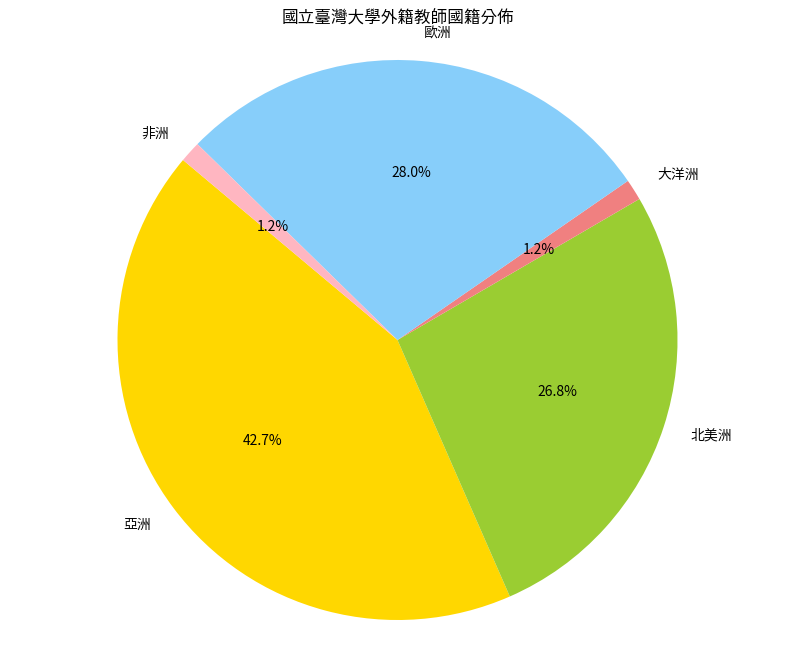

In [55]:


# 設置圓餅圖的標籤和大小
labels = continent_counts.index
sizes = continent_counts['總人數']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightpink']


# 繪製圓餅圖
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)

# 添加標題
plt.title('國立臺灣大學外籍教師國籍分佈')

# 顯示圖表
plt.axis('equal')  # 保持圓形
plt.show()


## 問題4: 統計每所學校外籍正教授人數

In [57]:
# 篩選出教授的資料
professors_data = df[['學校名稱', '教授男', '教授女']]

# 計算每所學校教授的總人數
professors_data['總人數'] = professors_data['教授男'] + professors_data['教授女']

# 篩選出總人數不為零的學校
school_professors = professors_data.groupby('學校名稱').sum()['總人數']
school_professors = school_professors[school_professors != 0]

# 顯示統計結果
print(school_professors)


學校名稱
世新大學         1
中信金融管理學院     2
中原大學         4
中國文化大學       7
中國醫藥大學       4
亞洲大學         5
佛光大學         2
元智大學         1
南華大學         1
國立中央大學      11
國立中山大學       6
國立中正大學       5
國立屏東科技大學     3
國立彰化師範大學     1
國立成功大學      11
國立政治大學       9
國立暨南國際大學     1
國立東華大學       2
國立清華大學      21
國立臺北大學       1
國立臺北科技大學     2
國立臺北藝術大學     4
國立臺南藝術大學     2
國立臺灣大學      17
國立臺灣師範大學    10
國立臺灣海洋大學     1
國立臺灣科技大學     2
國立臺灣藝術大學     2
國立陽明交通大學    20
國立雲林科技大學     5
國立高雄大學       4
國立高雄師範大學     1
國立高雄餐旅大學     2
大葉大學         1
弘光科技大學       1
文藻外語大學       4
明志科技大學       1
明道大學         1
朝陽科技大學       1
東海大學         6
淡江大學         8
義守大學         2
臺北醫學大學       3
華梵大學         1
輔仁大學         6
逢甲大學         2
長庚大學         7
長榮大學         1
高雄醫學大學       1
Name: 總人數, dtype: int64


<ipython-input-57-c36c0dea50ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  professors_data['總人數'] = professors_data['教授男'] + professors_data['教授女']


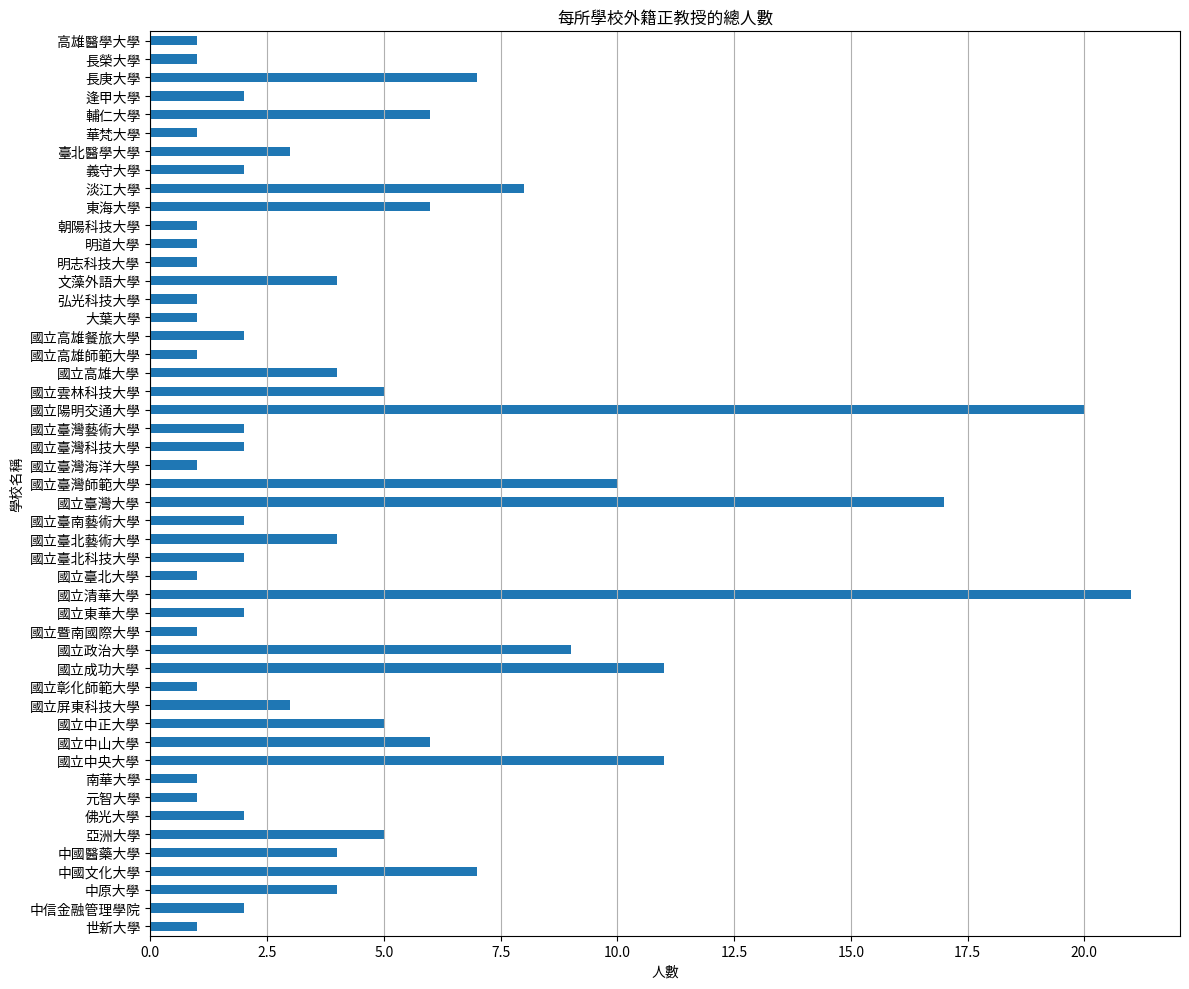

In [66]:
plt.figure(figsize=(12, 10))
school_professors.plot(kind='barh')
plt.title('每所學校外籍正教授的總人數')
plt.xlabel('人數')
plt.ylabel('學校名稱')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 問題5: 統計國立大學與私立大學外籍教師比例

In [69]:
# 篩選出國立大學和私立大學的教師資料
national_universities_data = df[df['學校名稱'].str.contains('國立') | df['學校名稱'].str.contains('市立')]
private_universities_data = df[~(df['學校名稱'].str.contains('國立') | df['學校名稱'].str.contains('市立'))]

# 計算國立大學和私立大學的教師總人數
national_professors_count = national_universities_data[['教授男', '教授女', '副教授男', '副教授女', '助理教授男', '助理教授女', '講師男', '講師女']].sum().sum()
private_professors_count = private_universities_data[['教授男', '教授女', '副教授男', '副教授女', '助理教授男', '助理教授女', '講師男', '講師女']].sum().sum()

print("國立大學外籍教師人數:", national_professors_count)
print("私立大學外籍教師人數:", private_professors_count)


國立大學外籍教師人數: 579
私立大學外籍教師人數: 592


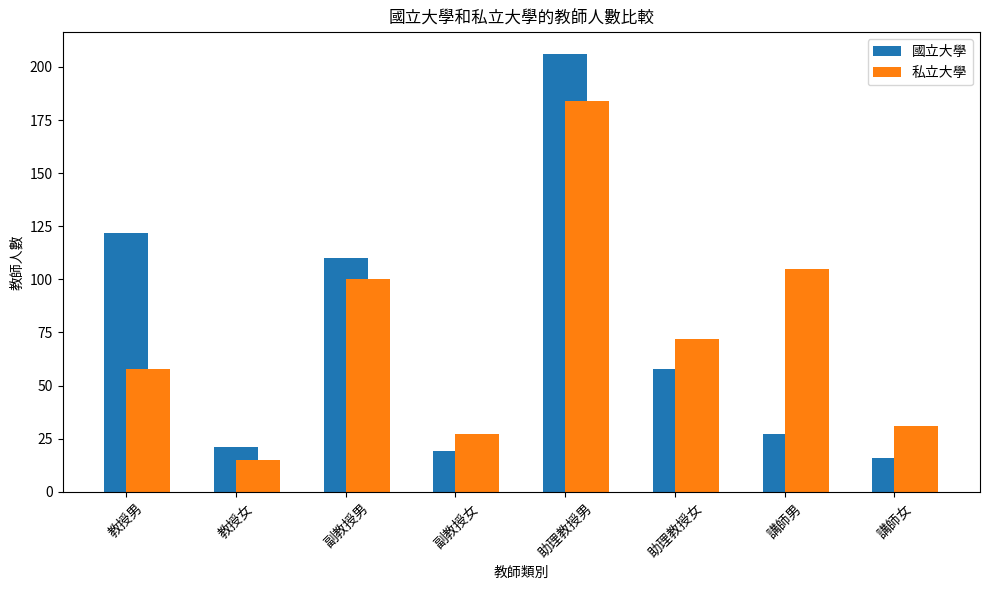

In [71]:
teacher_categories = ['教授男', '教授女', '副教授男', '副教授女', '助理教授男', '助理教授女', '講師男', '講師女']

# 計算國立大學和私立大學的教師人數
national_teacher_counts = national_universities_data[teacher_categories].sum()
private_teacher_counts = private_universities_data[teacher_categories].sum()

# 設置長條圖 x 軸數據
x = range(len(teacher_categories))

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(x, national_teacher_counts, width=0.4, label='國立大學', align='center')
plt.bar(x, private_teacher_counts, width=0.4, label='私立大學', align='edge')
plt.xlabel('教師類別')
plt.ylabel('教師人數')
plt.title('國立大學和私立大學的外籍教師人數比較')
plt.xticks(x, teacher_categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 問題6: 針對台灣大學，統計不同職位外籍教師人數

In [79]:
# 篩選出國立臺灣大學的資料
ntu_data = df[df['學校名稱'] == '國立臺灣大學']

# 計算不同職位的人數（男女加總）
professor_count = ntu_data['教授男'].sum() + ntu_data['教授女'].sum()
associate_professor_count = ntu_data['副教授男'].sum() + ntu_data['副教授女'].sum()
assistant_professor_count = ntu_data['助理教授男'].sum() + ntu_data['助理教授女'].sum()
lecturer_count = ntu_data['講師男'].sum() + ntu_data['講師女'].sum()


print(f'國立臺灣大學外籍教授人數：{professor_count}')
print(f'國立臺灣大學外籍副教授人數：{associate_professor_count}')
print(f'國立臺灣大學外籍助理教授人數：{assistant_professor_count}')
print(f'國立臺灣大學外籍講師人數：{lecturer_count}')


國立臺灣大學外籍教授人數：17
國立臺灣大學外籍副教授人數：25
國立臺灣大學外籍助理教授人數：36
國立臺灣大學外籍講師人數：4


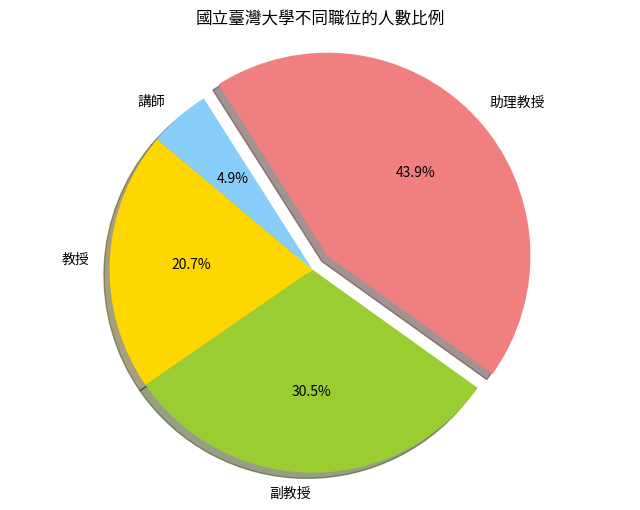

In [77]:
# 設置圓餅圖的標籤和大小
labels = ['教授', '副教授', '助理教授', '講師']
sizes = [professor_count, associate_professor_count, assistant_professor_count, lecturer_count]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)  # 突出顯示第一個片段

# 繪製圓餅圖
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 保持圓形
plt.title('國立臺灣大學不同職位的外籍人數比例')
plt.show()

## 所有學校外籍教師不同職位比例

In [83]:
all_professor_count = df['教授男'].sum() + df['教授女'].sum()
all_associate_professor_count = df['副教授男'].sum() + df['副教授女'].sum()
all_assistant_professor_count = df['助理教授男'].sum() + df['助理教授女'].sum()
all_lecturer_count = df['講師男'].sum() + df['講師女'].sum()

print(f'外籍教授人數：{all_professor_count}')
print(f'外籍副教授人數：{all_associate_professor_count}')
print(f'外籍助理教授人數：{all_assistant_professor_count}')
print(f'外籍講師人數：{all_lecturer_count}')

外籍教授人數：216
外籍副教授人數：256
外籍助理教授人數：520
外籍講師人數：179


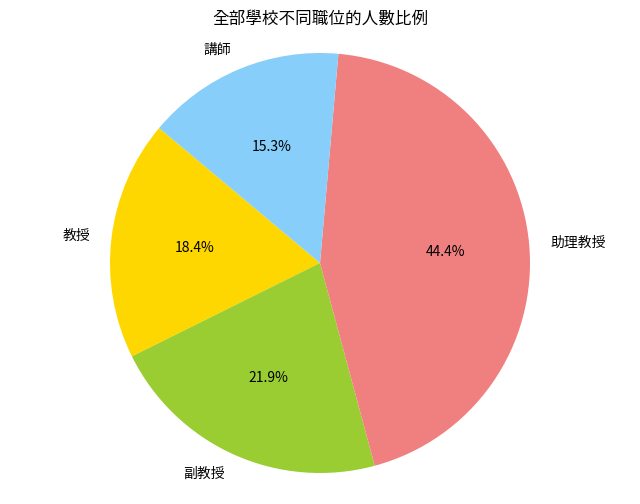

In [84]:
labels = ['教授', '副教授', '助理教授', '講師']
sizes = [all_professor_count, all_associate_professor_count, all_assistant_professor_count, all_lecturer_count]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']


# 繪製圓餅圖
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')  # 保持圓形
plt.title('全部學校不同職位的人數比例')
plt.show()